In [2]:
import fl_funcs
from fl_funcs import exponential
from fl_funcs import exponential_neg
import numpy as np

year = 2014
mo = 4
day = 15
sthr = 8
stmin = 53
arnum = 12036
xclnum = 1.3
xcl = 'C'
flnum = 1953
instrument = 'n5'
daystr = '15'
mostr = 'apr'
mostrcap = 'Apr'
yearstr = '2014'
imp = -4.18

bestflarefile = '/Users/coletamburri/Desktop/imp_dev/all_and_best_Oct_2022.mat'


print("Loading the data...")

sav_data_aia, sav_data, best304, start304, peak304, end304, eventindices,\
    times304, curves304, aia_cumul8, aia_step8, last_cumul8, hmi_dat,\
    last_mask = fl_funcs.load_variables(bestflarefile, year, mo, day, sthr,
                                        stmin, arnum, xclnum, xcl)

X, Y, conv_f, xarr_Mm, yarr_Mm = fl_funcs.conv_facts()

print("Data loaded! Now just some masking and spur removal.")

hmi_cumul_mask1, hmi_step_mask1, hmi_pos_mask_c, hmi_neg_mask_c \
    = fl_funcs.pos_neg_masking(aia_cumul8, aia_step8, hmi_dat, last_mask)

neg_rem, pos_rem = fl_funcs.spur_removal_sep(hmi_neg_mask_c, hmi_pos_mask_c,
                                             pos_crit=2, neg_crit=2,
                                             ilo=390, ihi=500, ihi3=420,
                                             jlo3=425, ilo2=390, ihi2=450)

print("Convolving the HMI images and making the PIL mask.")

Loading the data...
Data loaded! Now just some masking and spur removal.
Convolving the HMI images and making the PIL mask.


In [3]:
hmi_con_pos_c, hmi_con_neg_c, pil_mask_c = fl_funcs.gauss_conv(pos_rem,
                                                               neg_rem,
                                                               sigma=2)

pil_mask_c, ivs, dvs, hmik = fl_funcs.pil_gen(
    pil_mask_c, hmi_dat, threshperc=0.01)

print("Separation values determination.")

aia8_pos_step, aia8_neg_step = fl_funcs.mask_sep(aia_step8, hmi_dat)

pos_rem0, neg_rem0 = fl_funcs.spur_removal_sepopt3(
    aia8_pos_step, aia8_neg_step, klo=375, jlo=375, klo2=200)

distpos_med, distpos_mean, distneg_med, distpos_mean \
    = fl_funcs.separation(aia_step8, ivs, dvs, pos_rem0, neg_rem0)


print("Elongation values determination.")

aia8_pos_2, aia8_neg_2 = fl_funcs.mask_elon(aia_cumul8, hmi_dat)

neg_rem1, pos_rem1 = fl_funcs.spur_removal_elon(aia8_pos_2, aia8_neg_2,
                                                neg_crit=6, jhi=600,
                                                klo=375, pos_crit=3)

ivs_lim, dvs_lim, med_x, med_y = fl_funcs.lim_pil(ivs, dvs)

Separation values determination.
Elongation values determination.


In [4]:
ylim0_neg = 325
ylim1_neg = 450
ylim0_pos = int(round(med_y)-100)
ylim1_pos = int(round(med_y)+100)
xlim0_neg = 300
xlim1_neg = 500
xlim0_pos = 350
xlim1_pos = 500

aia_pos_rem, aia_neg_rem = fl_funcs.rib_lim_elon(aia8_pos_2, aia8_neg_2,
                                                 pos_rem1, neg_rem1, med_x,
                                                 med_y, ylim0_pos, ylim1_pos,
                                                 ylim0_neg, ylim1_neg,
                                                 xlim0_pos, xlim1_pos,
                                                 xlim0_neg, xlim1_neg)


lr_coord_neg, lr_coord_pos = fl_funcs.find_rib_coordinates(aia_pos_rem,
                                                           aia_neg_rem)


ivs_sort, dvs_sort, sortedpil = fl_funcs.sort_pil(ivs_lim, dvs_lim)

pil_right_near_pos, pil_left_near_pos, pil_right_near_neg, pil_left_near_neg \
    = fl_funcs.elon_dist_arrays(lr_coord_pos, lr_coord_neg, ivs_lim, dvs_lim,
                                ivs_sort, dvs_sort)


lens_pos, lens_neg = fl_funcs.elongation(pil_right_near_pos, pil_left_near_pos,
                                         pil_right_near_neg, pil_left_near_neg,
                                         sortedpil)

dist_pos = distpos_med
dist_neg = distneg_med

print("Converting separation and elongation to Mm.")

lens_pos_Mm, lens_neg_Mm, distpos_Mm, distneg_Mm, dneg_len, dpos_len, \
    dneg_dist, dpos_dist = fl_funcs.convert_to_Mm(lens_pos, dist_pos, lens_neg,
                                                  dist_neg, conv_f)

print("Loading parameters for 304 and 1600 Angstrom light curves.")


Converting separation and elongation to Mm.
Loading parameters for 304 and 1600 Angstrom light curves.


Determining the regions of separation and elongation.
Plotting ribbon masks.
Plotting convolution masks.
Plotting PIL with representative polynomial.
Plotting ribbon separation.
Plotting ribbon elongation.


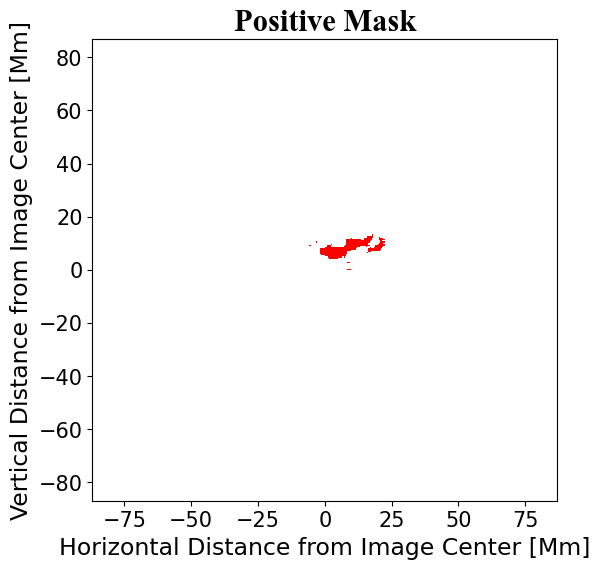

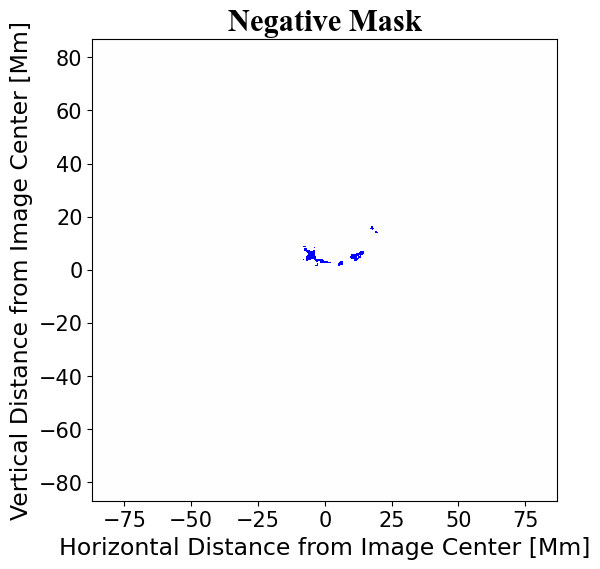

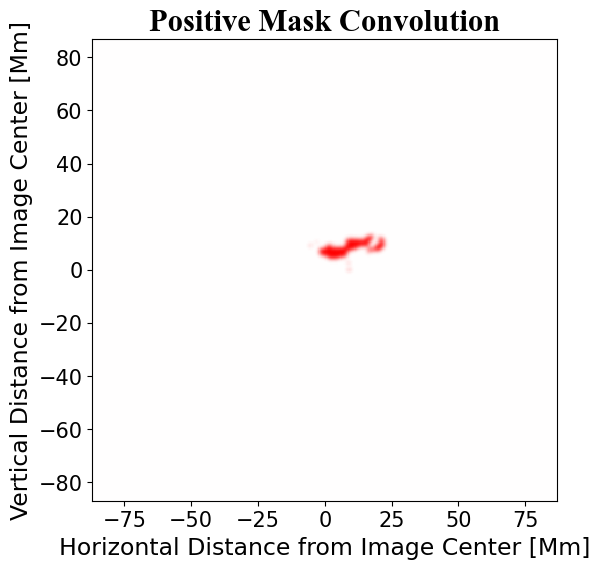

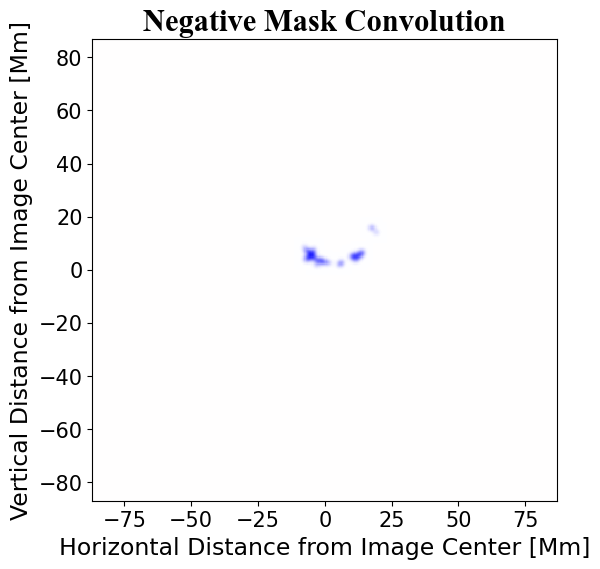

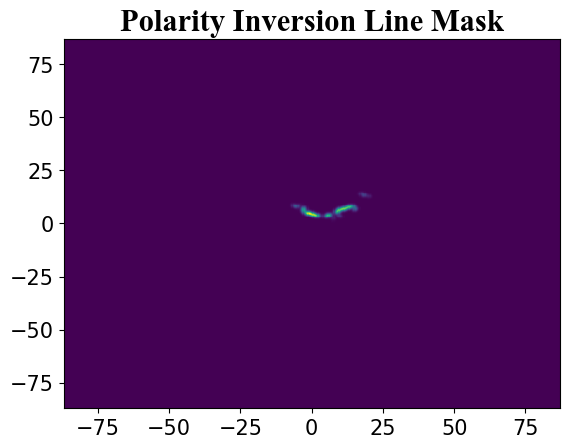

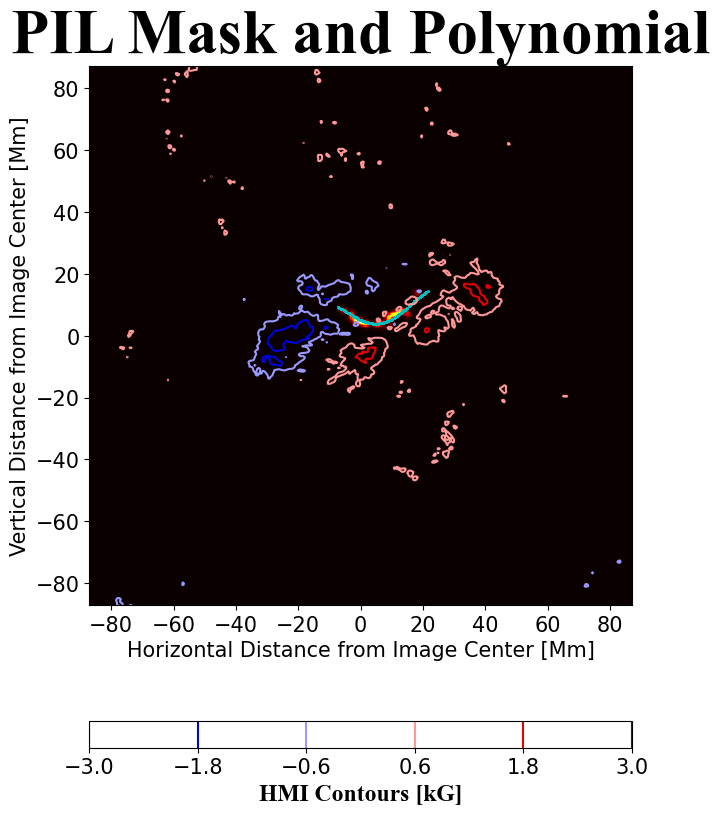

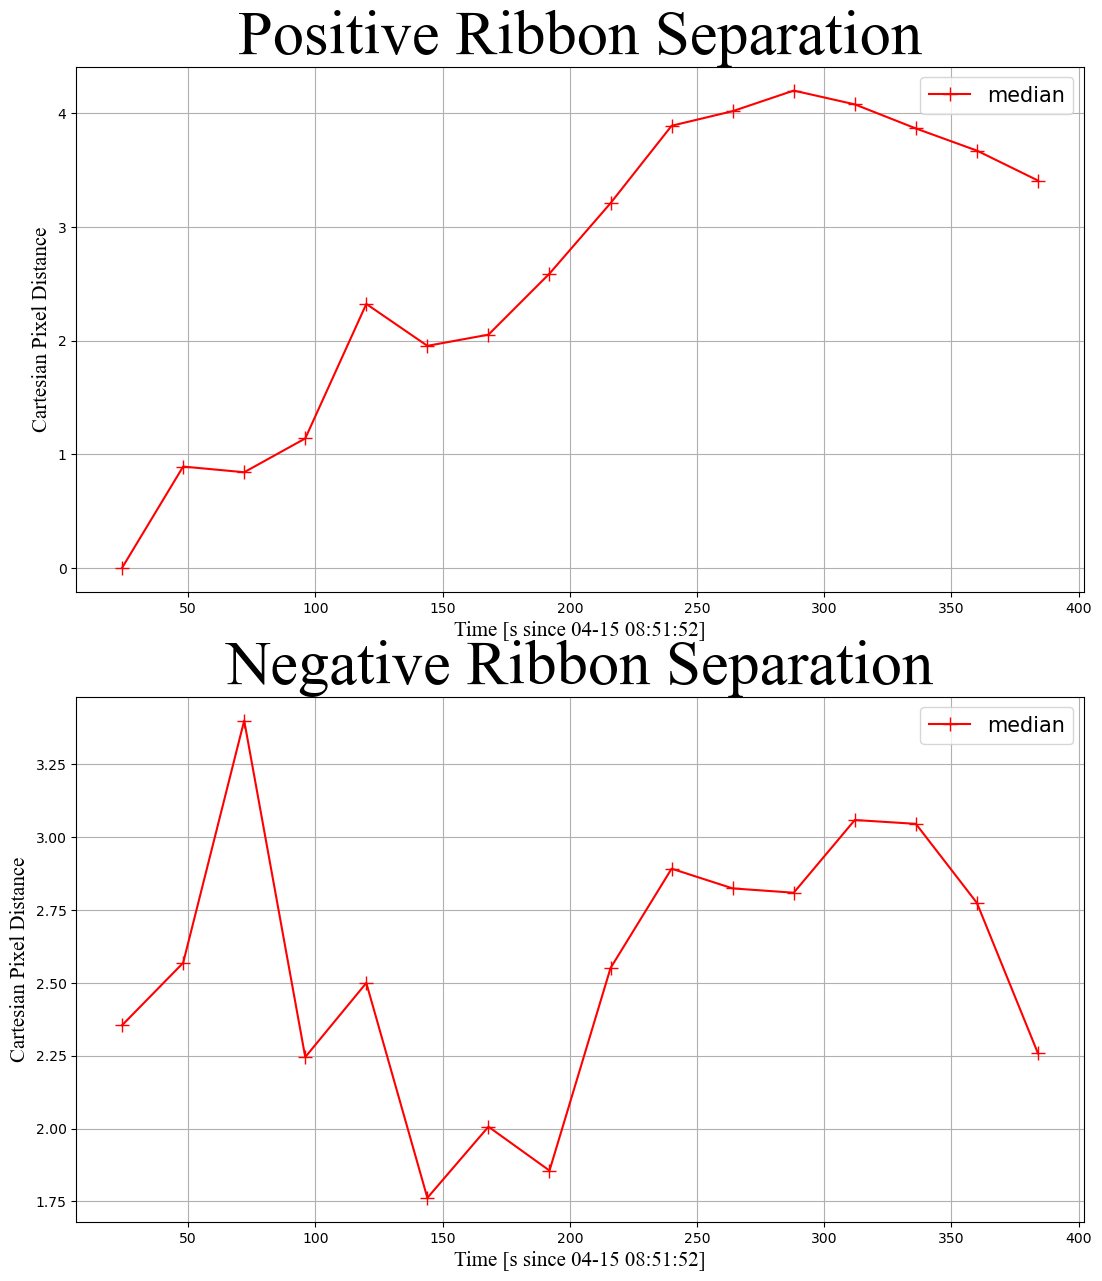

In [5]:
startin, peakin, endin, times, s304, e304, filter_304, med304, std304, \
    timelab, aiadat, nt, dn1600, time304, times1600 \
    = fl_funcs.prep_304_1600_parameters(sav_data_aia, sav_data, eventindices,
                                        flnum, start304, peak304, end304,
                                        times304, curves304,outflag = 1953)

posrib, negrib, pos1600, neg1600 = fl_funcs.img_mask(aia8_pos_step,
                                                     aia8_neg_step, aiadat, nt)

print("Determining the regions of separation and elongation.")


elonperiod_start_pos, elonperiod_end_pos, elonperiod_start_neg, \
    elonperiod_end_neg = fl_funcs.elon_periods(dpos_len, dneg_len, m_min=0,
                                               neg_crit=0)

sepperiod_start_pos, sepperiod_end_pos, sepperiod_start_neg, \
    sepperiod_end_neg = fl_funcs.sep_periods(dpos_dist, dneg_dist, start=1)

dt1600, dt304 = fl_funcs.prep_times(dn1600, time304)

print("Plotting ribbon masks.")

fl_funcs.mask_plotting(X, Y, pos_rem, neg_rem, xarr_Mm, yarr_Mm, flnum)

print("Plotting convolution masks.")

fl_funcs.convolution_mask_plotting(X, Y, hmi_con_pos_c, hmi_con_neg_c,
                                   pil_mask_c, xarr_Mm, yarr_Mm, flnum,
                                   xlim=[200, 600], ylim=[200, 600])

print("Plotting PIL with representative polynomial.")

fl_funcs.pil_poly_plot(X, Y, pil_mask_c, hmi_dat, ivs, dvs, conv_f, xarr_Mm,
                       yarr_Mm, flnum)

print("Plotting ribbon separation.")

pltstrt = 1

fl_funcs.ribbon_sep_plot(dist_pos, dist_neg, times, flnum, pltstrt, dt1600)

print("Plotting ribbon elongation.")


Plotting Elongation with Periods
Plotting Separation with Periods
Processing data for reconnection flux model.
Load fluxes and pixel counts.
The same, for instantaneous flux.
Reconnection Rate Determination, Plotting.


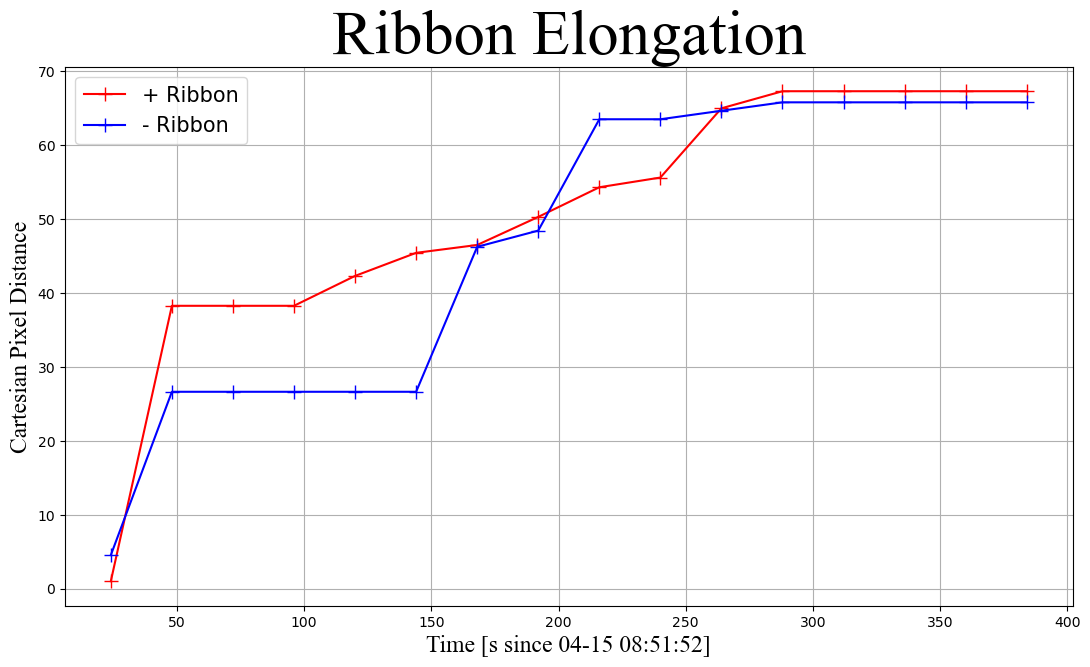

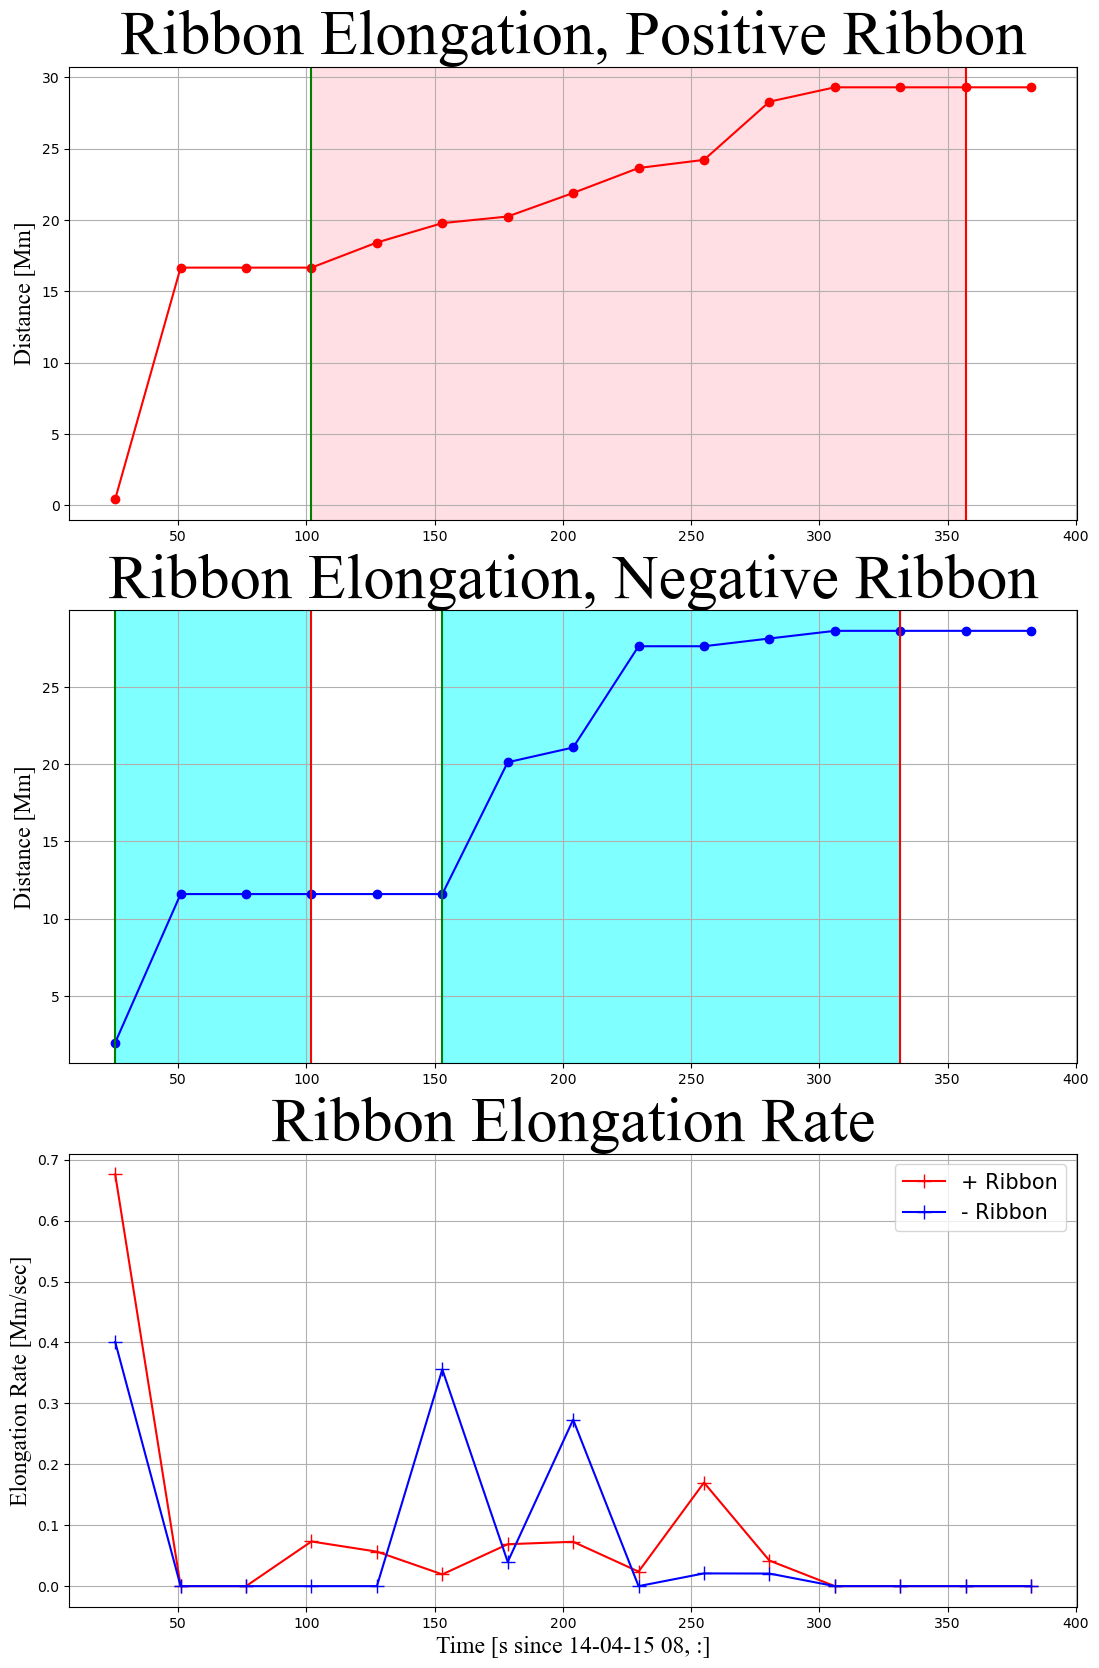

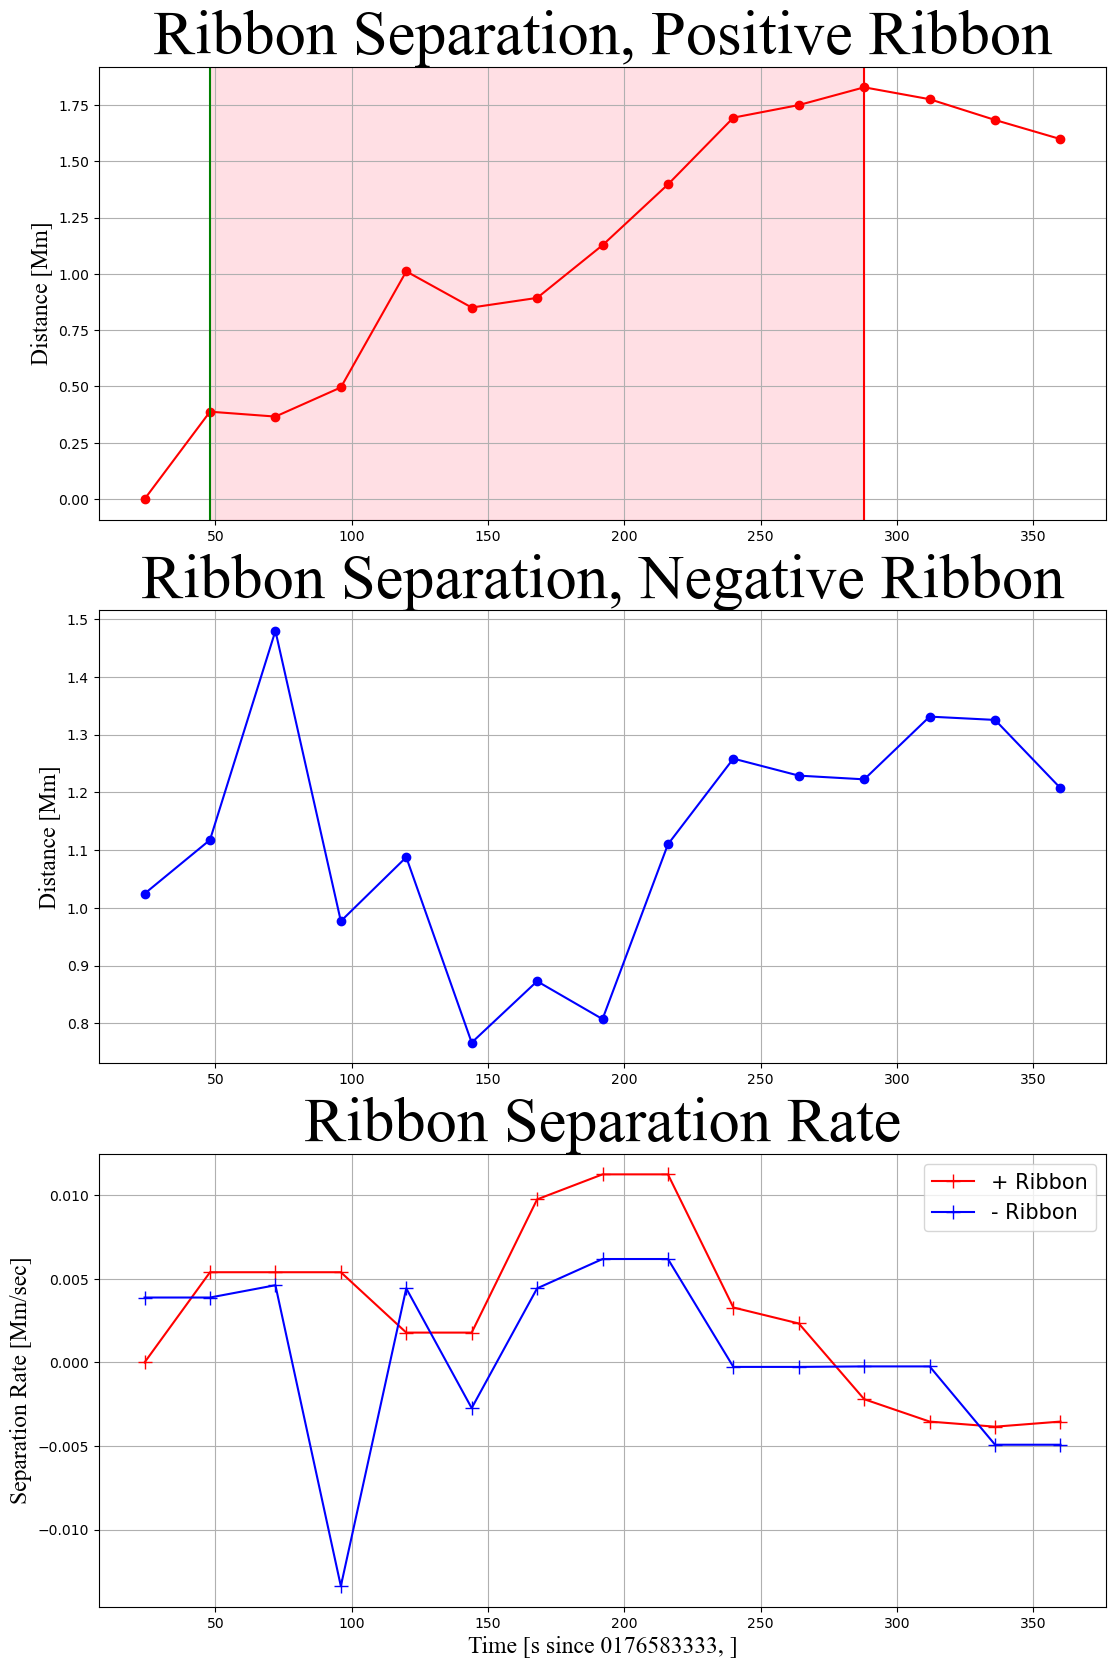

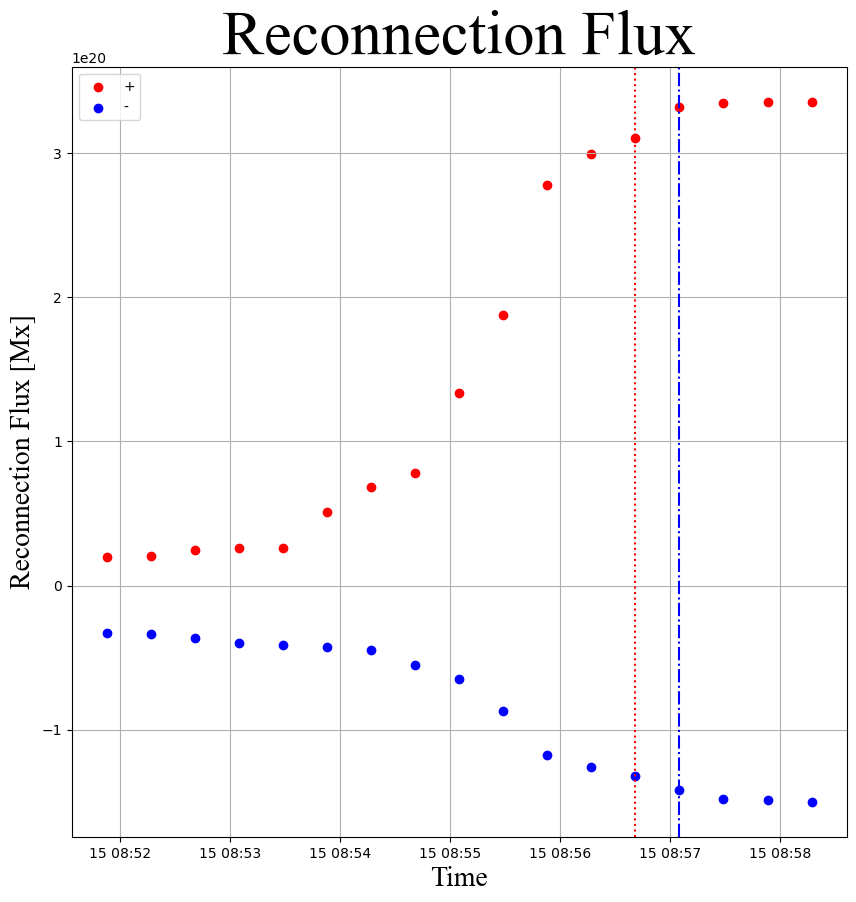

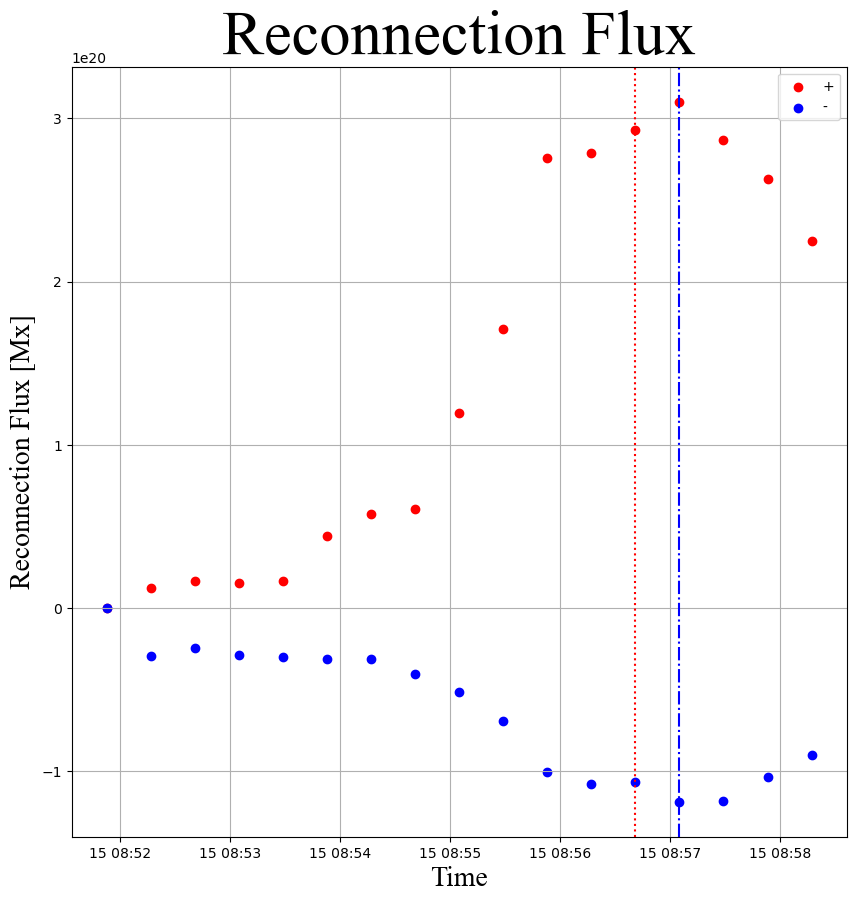

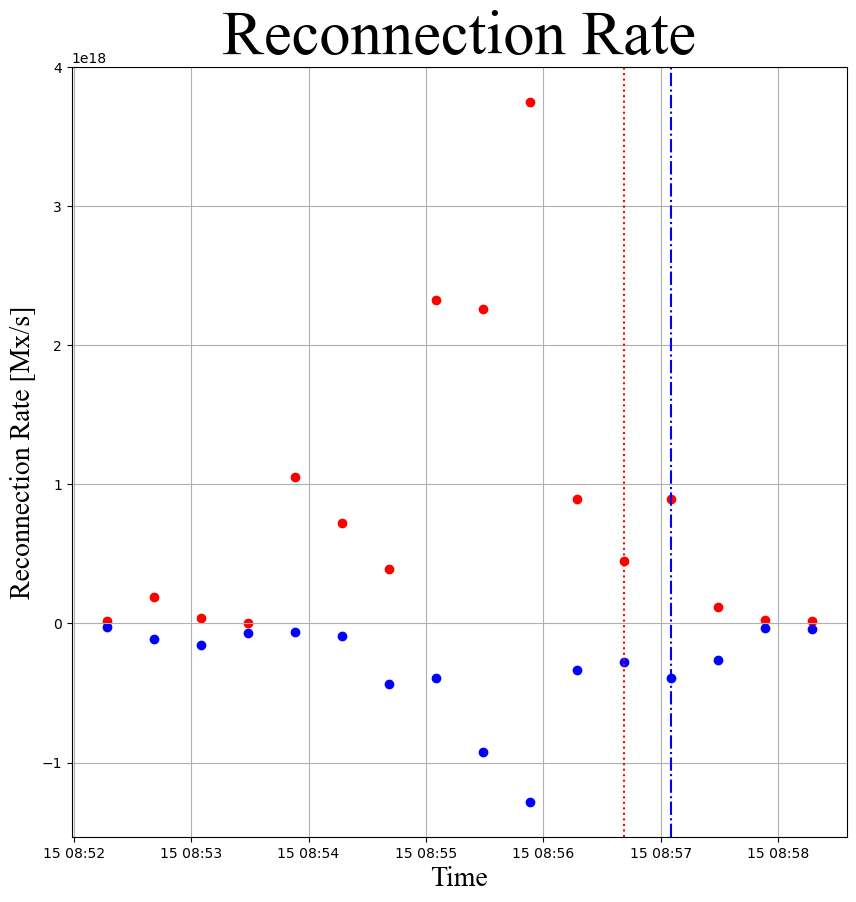

In [6]:
pltstrt = 1

fl_funcs.ribbon_elon_plot(lens_pos, lens_neg, times, pltstrt, flnum, dt1600)

print("Plotting Elongation with Periods")
indstrt = 1
fl_funcs.elon_period_plot(dpos_len, dneg_len, times, times1600, lens_pos_Mm,
                          lens_neg_Mm, flnum, elonperiod_start_neg,
                          elonperiod_start_pos, elonperiod_end_neg,
                          elonperiod_end_pos, indstart=indstrt)

print("Plotting Separation with Periods")

indstrt = 1
fl_funcs.sep_period_plot(dpos_dist, dneg_dist, times, distpos_Mm, distneg_Mm,
                         flnum, sepperiod_start_pos, sepperiod_end_pos,
                         sepperiod_start_neg, sepperiod_end_neg,
                         indstrt=indstrt)

print("Processing data for reconnection flux model.")

hmi, aia8_pos, aia8_neg, aia8_inst_pos, aia8_inst_neg, peak_pos, \
    peak_neg = fl_funcs.flux_rec_mod_process(
        sav_data, dt1600, pos1600, neg1600)

print("Load fluxes and pixel counts.")

rec_flux_pos, rec_flux_neg, pos_pix, neg_pix, pos_area_pix, neg_area_pix, ds2,\
    pos_area, neg_area = fl_funcs.cumul_flux_process(aia8_pos, aia8_neg,
                                                     conv_f, flnum, peak_pos,
                                                     peak_neg, hmi, dt1600)

print("The same, for instantaneous flux.")

rec_flux_pos_inst, rec_flux_neg_inst, pos_pix_inst, neg_pix_inst, \
    ds2 = fl_funcs.inst_flux_process(aia8_inst_pos, aia8_inst_neg, flnum,
                                     conv_f, hmi, dt1600, peak_pos, peak_neg)

print("Reconnection Rate Determination, Plotting.")

rec_rate_pos, rec_rate_neg = fl_funcs.rec_rate(rec_flux_pos, rec_flux_neg,
                                               dn1600, dt1600, peak_pos,
                                               peak_neg, flnum)

Exponential curve fitting for the fluxes.
Exponential curve plot.
Begin determination of shear


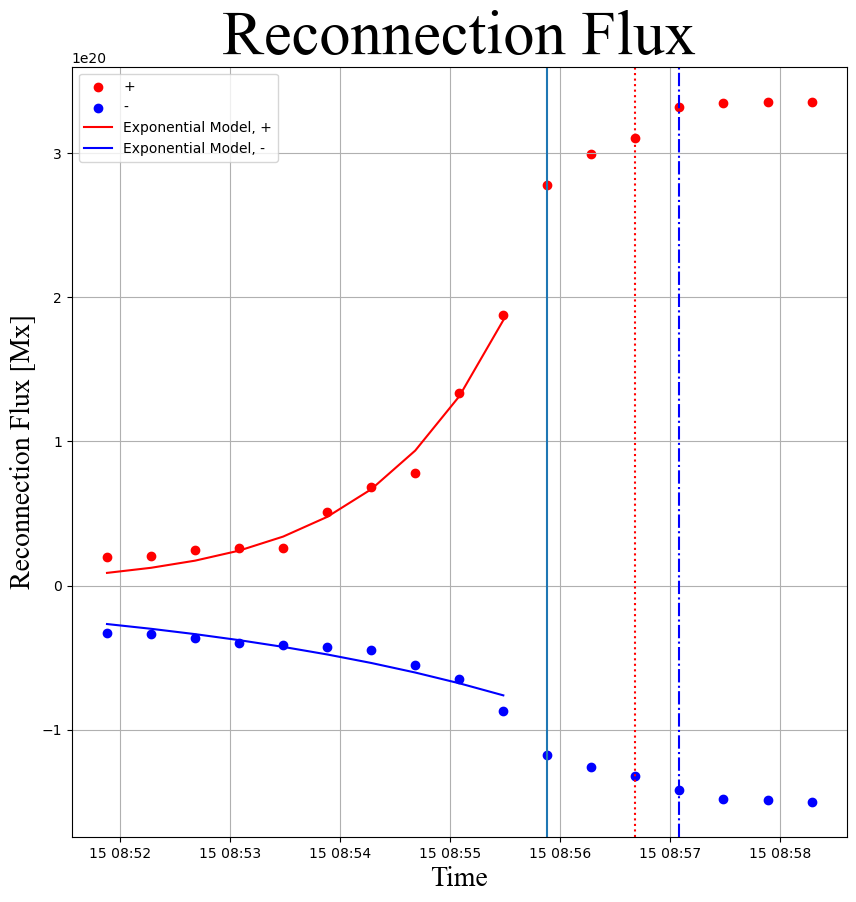

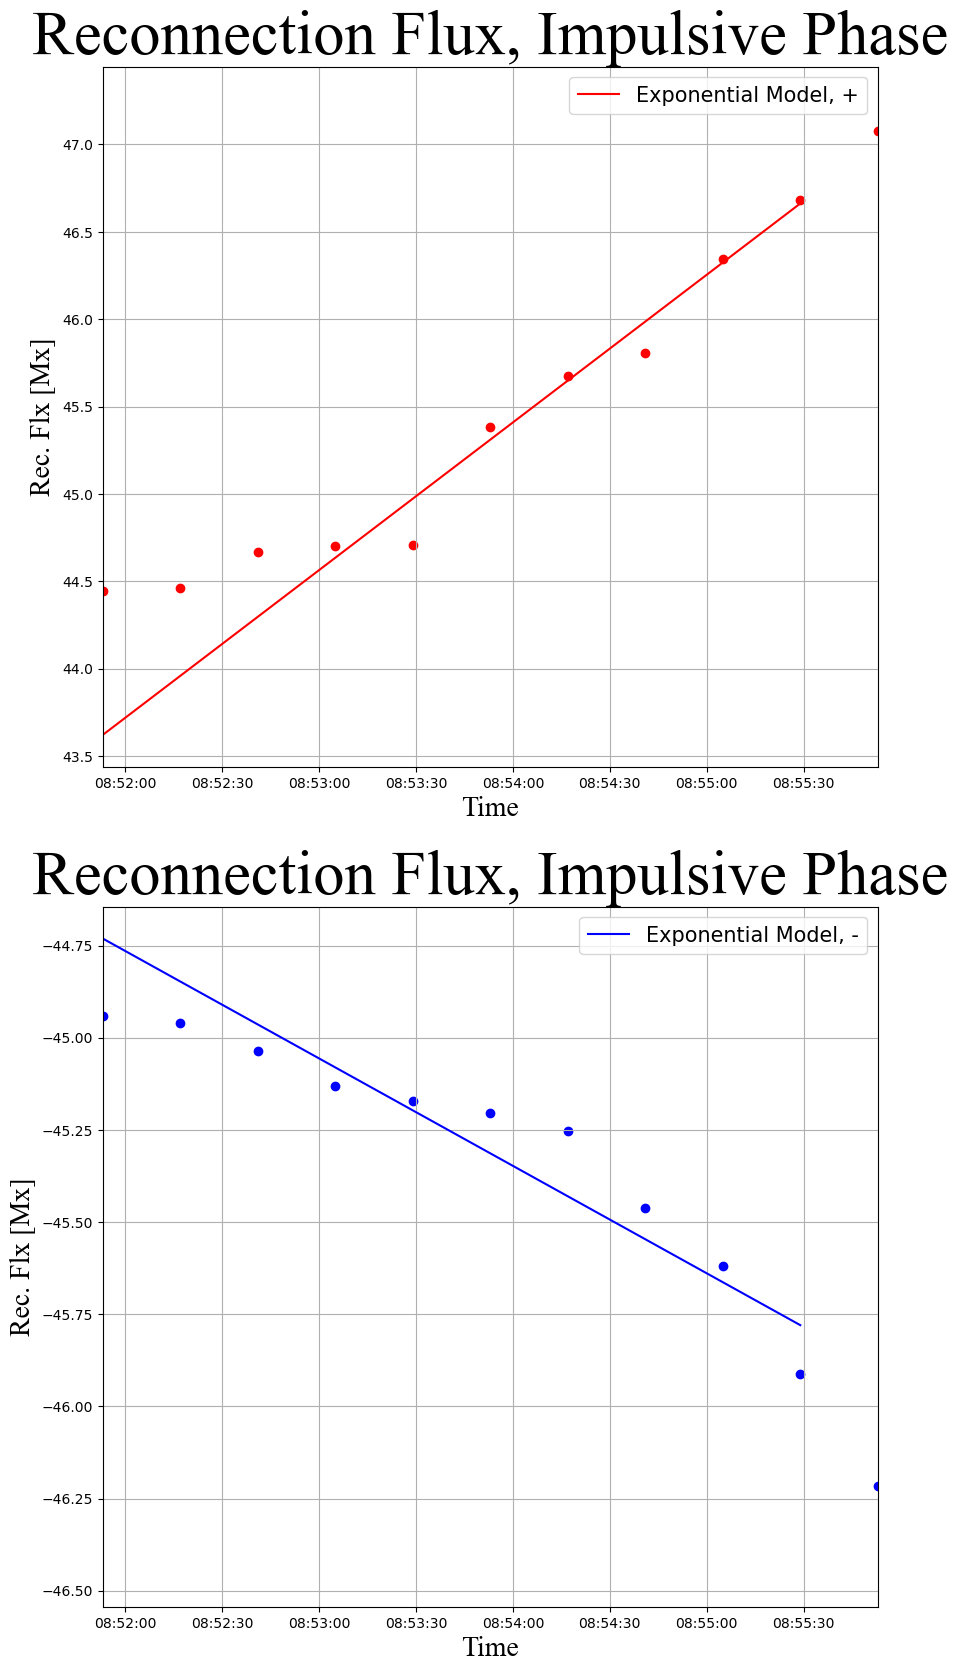

In [7]:
exp_ind = np.argmax(rec_rate_pos)+1
exp_ind_area = np.argmax(rec_rate_pos)+1

print("Exponential curve fitting for the fluxes.")

poptposflx, pcovposflx, poptnegflx, pcovnegflx, \
    poptpos, poptneg, pcovpos, pcovneg, rise_pos_flx, \
    rise_neg_flx = fl_funcs.exp_curve_fit(exp_ind, exp_ind_area, pos_pix,
                                          neg_pix, exponential,
                                          exponential_neg, pos_area,
                                          neg_area)

print("Exponential curve plot.")

fl_funcs.exp_curve_plt(dt1600, rec_flux_pos, rec_flux_neg, rise_pos_flx,
                       rise_neg_flx, peak_pos, peak_neg, exp_ind, ds2,
                       exponential, exponential_neg, poptposflx, poptnegflx,
                       flnum)

#print("Ribbon Area Plot")

#fl_funcs.rib_area_plt(dt1600, poptpos, poptneg, flnum, pos_area_pix,
#                      neg_area_pix, peak_pos, peak_neg, exp_ind)

print("Begin determination of shear")

Plot guide field ratio proxy based on footpoints.
Fermi Processing


/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:3819: RuntimeWarning: invalid value encountered in true_divide
  gfr = guide/(distneg_med+distpos_med)


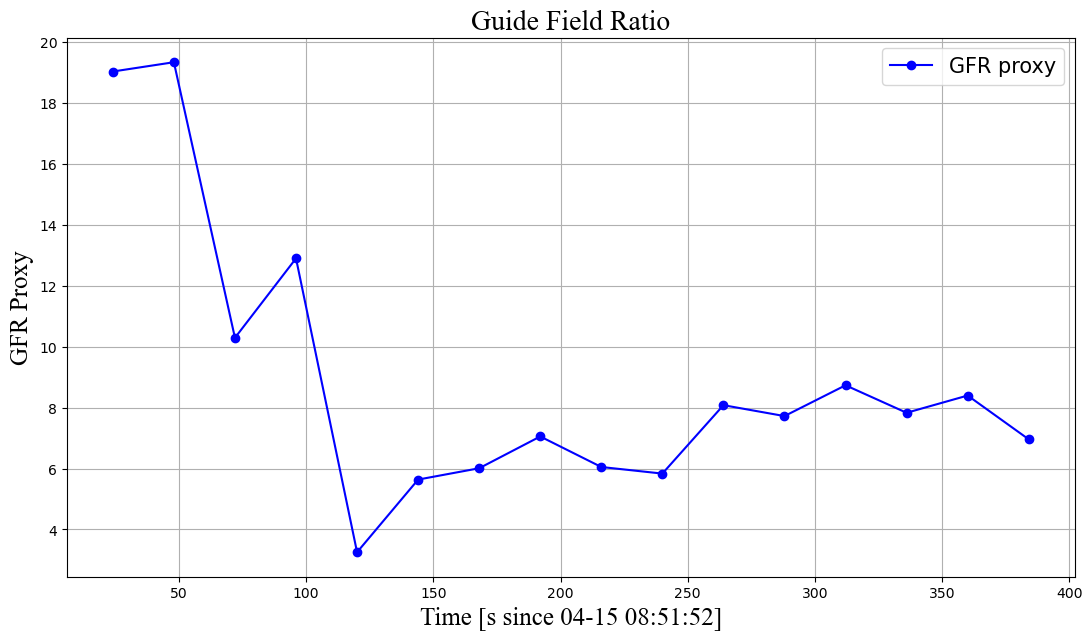

In [8]:
negylow = ylim0_neg
negyhi = ylim1_neg
negxlow = xlim0_neg
negxhi = xlim1_neg

posylow = ylim0_pos
posyhi = ylim1_pos
posxlow = xlim0_pos
posxhi = xlim1_pos

# Isolate ribbons appropriately for shear analysis
aia_neg_rem_shear, aia_pos_rem_shear = fl_funcs.\
    shear_ribbon_isolation(aia8_neg_step, aia8_pos_step, med_x, med_y,
                           negylow=negylow, negyhi=negyhi, posylow=posylow,
                           posyhi=posyhi, negxlow=negxlow, negxhi=negxhi,
                           posxlow=posxlow, posxhi=posxhi)

# Left and right coordinates of positive and negative ribbons
lr_coord_neg_shear, lr_coord_pos_shear = \
    fl_funcs.leftrightshear(aia_pos_rem_shear, aia_neg_rem_shear)

# PIL pixels closest to the left and right coordinates of positive and negative
# ribbons
pil_right_near_pos_shear, pil_left_near_pos_shear, pil_right_near_neg_shear,\
    pil_left_near_neg_shear = fl_funcs.sheardists(lr_coord_pos_shear,
                                                  lr_coord_neg_shear,
                                                  ivs_sort, dvs_sort)

# Guide field to the right and left edges of ribbons
guide = fl_funcs.guidefieldlen_alt(pil_right_near_pos_shear,
                                   pil_left_near_pos_shear,
                                   pil_right_near_neg_shear,
                                   pil_left_near_neg_shear,
                                   sortedpil, fl_funcs.curve_length, 'posleft')

# Guide field ratio to the right and left edges of ribbons
gfr = fl_funcs.gfrcalc_alt(guide, distneg_med, distpos_med)

print("Plot guide field ratio proxy based on footpoints.")

# Plot guide field ratio
fl_funcs.plt_gfr(times, gfr, gfr, flnum, dt1600, flag=1)

print("Fermi Processing")

0.3999999999999999


/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:4070: RuntimeWarning: divide by zero encountered in true_divide
  E_rat = E_pos/E_neg
/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py:4070: RuntimeWarning: invalid value encountered in true_divide
  E_rat = E_pos/E_neg


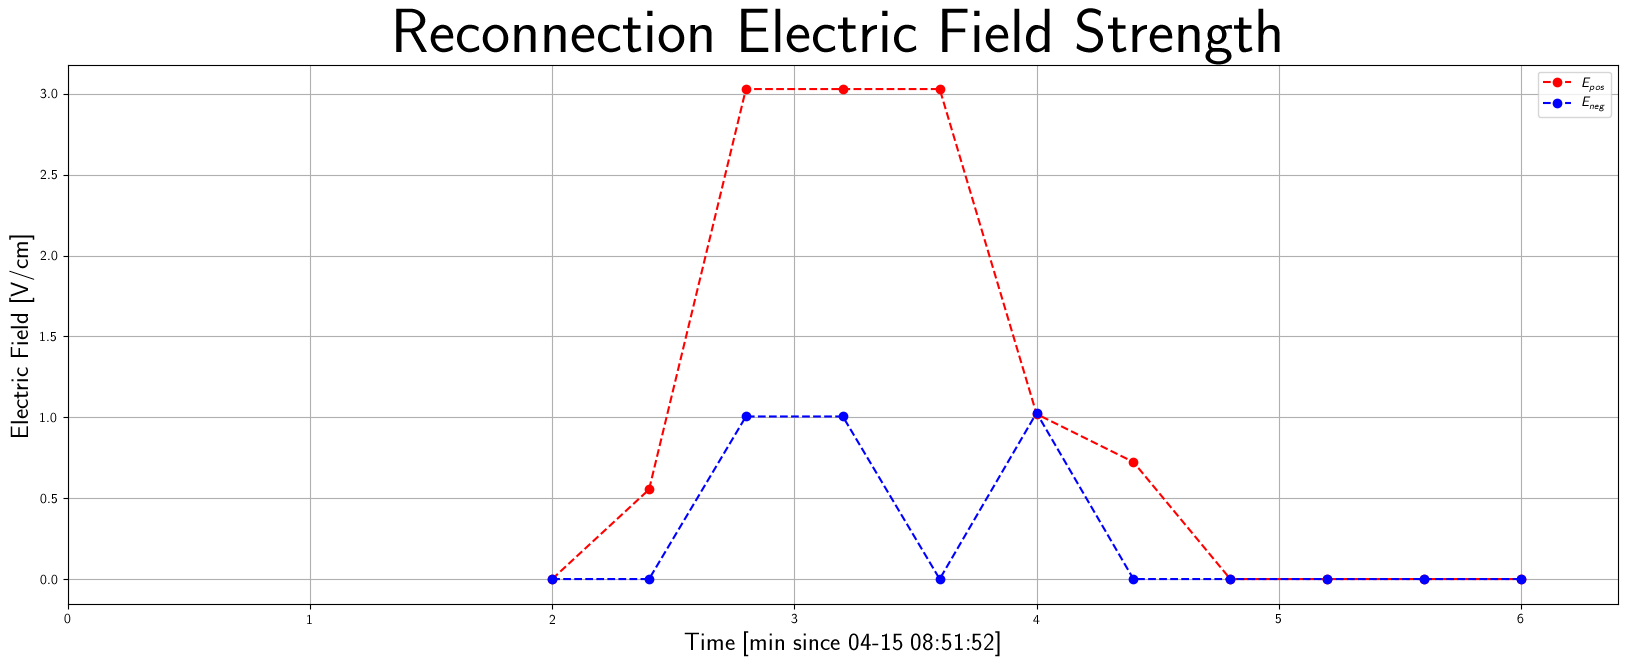

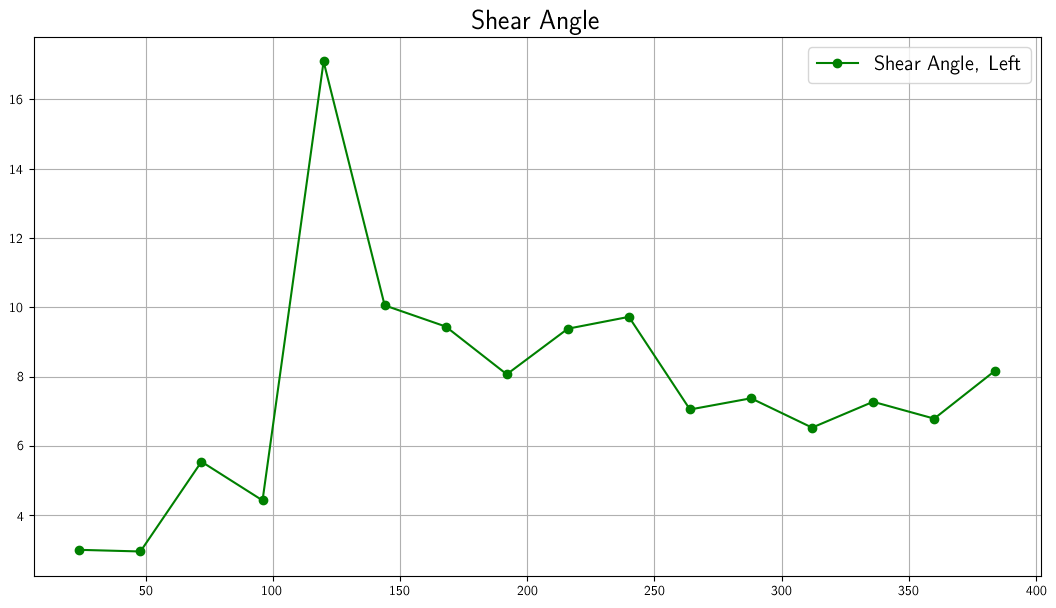

In [55]:
importlib.reload(fl_funcs)
raw_hxr_sum, cspec_hxr_sum, fermitimes = fl_funcs.process_fermi(daystr, mostr,
                                                                yearstr,
                                                                instrument,
                                                                day, mo, year,
                                                                low=5000,
                                                                high=7000,
                                                                ylo=1e-3,
                                                                yhi=10)

# Figure for timestamp comparison

indstrt_sep = 1
indstrt_elon = 1
gfr_trans = 5

E_pos, E_neg, E_rat, time_E = fl_funcs.E_field_det(conv_f, distpos_med,
                                                   distneg_med, timelab,
                                                   hmi_dat, pos_rem, neg_rem,
                                                   flnum, dt1600, times,
                                                   startind=gfr_trans)

E_pos = np.append(E_pos, E_pos[-1])
E_neg = np.append(E_neg, E_neg[-1])

shear_ang = fl_funcs.shear_to_angle(times, flnum, dt1600, gfr, gfr)

quartermaxtim = fl_funcs.quartermaxtime(
    gfr_trans, gfr, gfr, timelab, fl_funcs.find_nearest_ind, flag=0)

print(quartermaxtim)

In [13]:
import importlib

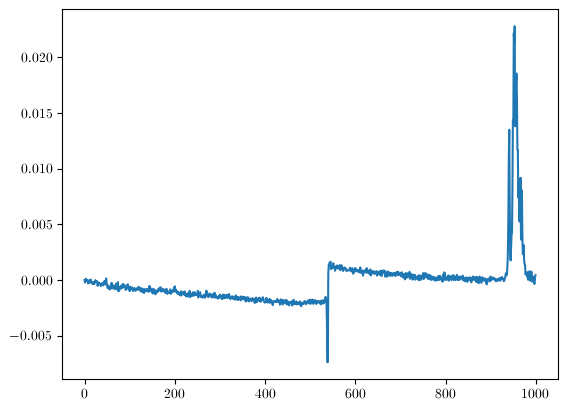

In [46]:
import matplotlib.pyplot as plt
low_hxr=3500
high_hxr=4500
plt.plot(cspec_hxr_sum[low_hxr:high_hxr,0]/275)

In [52]:
importlib.reload(fl_funcs)

<module 'fl_funcs' from '/Users/coletamburri/Desktop/flare_imp_study/fl_funcs.py'>

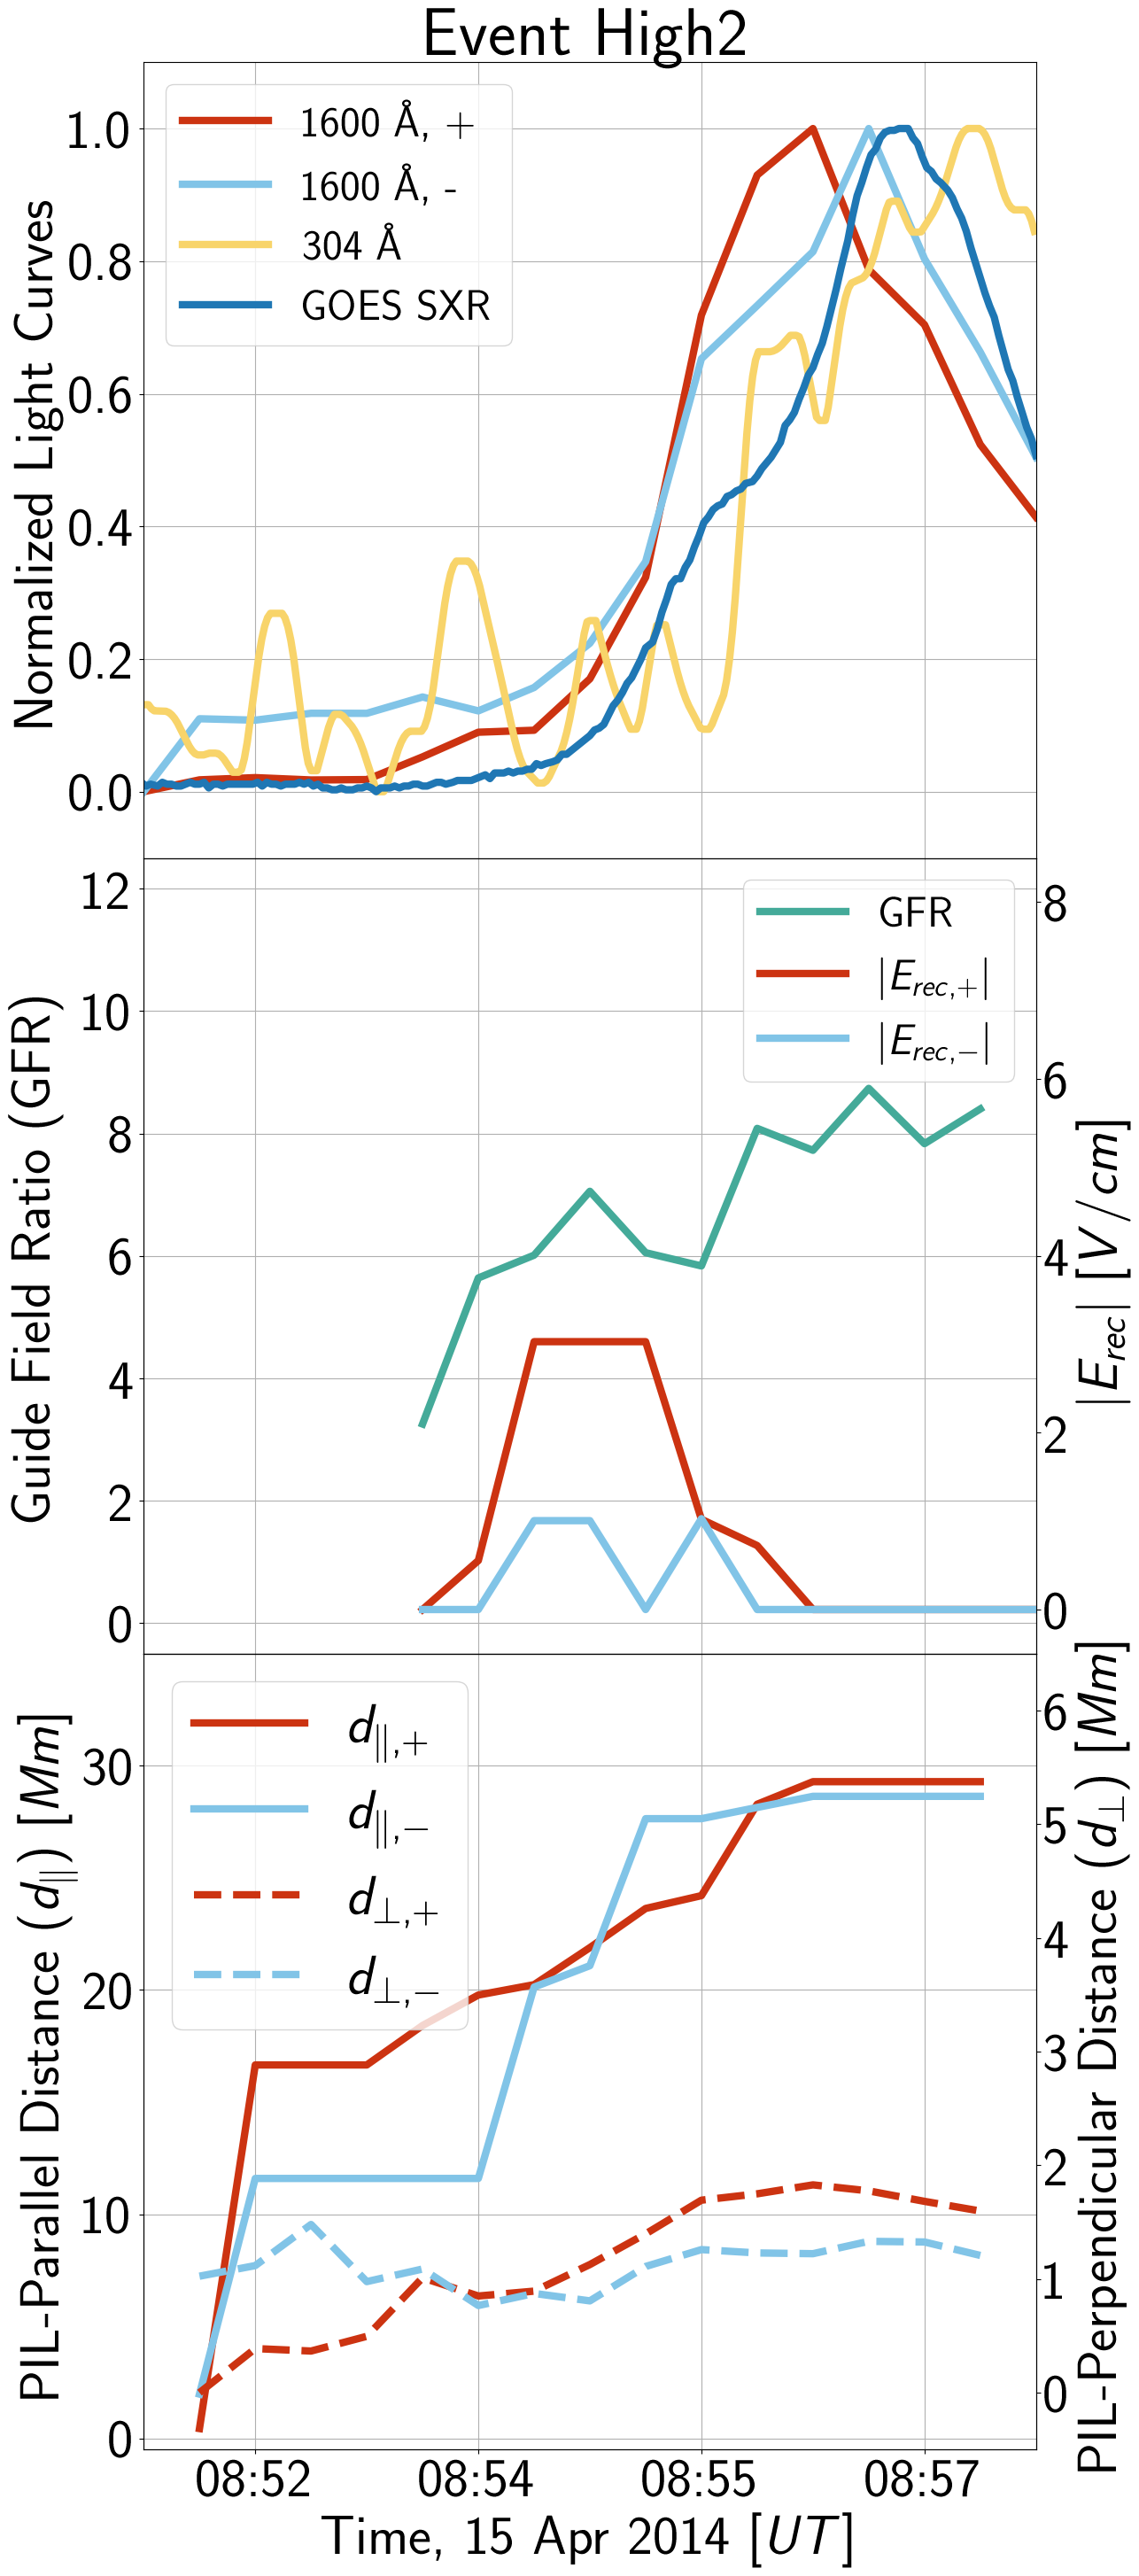

In [53]:
muted = fl_funcs.color_muted()
vibrant = fl_funcs.color_vibrant()
medc = fl_funcs.color_medc()
level = 'high'
sxr_fn='/Users/coletamburri/Desktop/sci_gxrs-l2-irrad_g15_d20140415_v0-0-0.nc'

fl_funcs.plt_fourpanel(times, gfr, gfr, flnum, dt1600, time304,
                       filter_304, lens_pos_Mm, lens_neg_Mm, distpos_Mm,
                       distneg_Mm, dt304, timelab, conv_f,
                       elonperiod_start_pos, elonperiod_end_pos,
                       elonperiod_start_neg, elonperiod_end_neg,
                       sepperiod_start_pos, sepperiod_end_pos,
                       sepperiod_start_neg, sepperiod_end_neg, exp_ind,
                       s304, e304, pos1600, neg1600, dn1600, indstrt_elon,
                       indstrt_sep, fermitimes, raw_hxr_sum, cspec_hxr_sum,
                       gfr_trans, E_pos, E_neg, time_E, daystr,mostrcap,yearstr,
                       xcl,xclnum,imp, muted, vibrant, medc, sxr_fn,level,low_hxr=5000,
                       high_hxr=7000,  period_flag=0,fermioff=1,
                       flag=1, tick_space=4,fllab='High2',locationleg='upper left')